In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV



In [76]:
df = pd.read_csv(r'WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [77]:
df.drop('customerID',axis=1,inplace=True)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
print(df.nunique())


gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


# PREPROCESSING

fixing multiple lines

In [20]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [37]:
df['MultipleLines'].replace({"No phone service":"No"},inplace=True)

InternetService

In [85]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

OnlineSecurity

In [56]:
df['OnlineSecurity'].value_counts()

0    3498
2    2019
1    1526
Name: OnlineSecurity, dtype: int64

In [38]:
df['MultipleLines'].replace({"No phone service":"No"},inplace=True)

onlineBackup

In [55]:
df['OnlineBackup'].value_counts()

0    4614
1    2429
Name: OnlineBackup, dtype: int64

In [39]:
df['OnlineBackup'].replace({'No internet service':'No'},inplace=True)

DeviceProtection

In [31]:
df['DeviceProtection'].value_counts()

No     4621
Yes    2422
Name: DeviceProtection, dtype: int64

In [40]:
df['DeviceProtection'].replace({'No internet service':'No'},inplace=True)

TechSupport

In [34]:
df['TechSupport'].value_counts()

No     4999
Yes    2044
Name: TechSupport, dtype: int64

In [41]:
df['TechSupport'].replace({'No internet service':'No'},inplace=True)

StreamingTV

In [35]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [42]:
df['StreamingTV'].replace({'No internet service':'No'},inplace=True)

StreamingMovies

In [37]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [43]:
df['StreamingMovies'].replace({'No internet service':'No'},inplace=True)

Contract 

In [42]:
df['Contract'].value_counts()

1    3875
3    1695
2    1473
Name: Contract, dtype: int64

In [44]:
df['Contract'].replace({'Month-to-month':1,'One year':10,'Two year':20},inplace=True)

PaperlessBilling

In [43]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [44]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [45]:
df['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [50]:
df['TotalCharges'].value_counts()

3261.89    11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6531, dtype: int64

In [64]:
df['MultipleLines'].replace({"No phone service":"No"},inplace=True)
df['MultipleLines'].replace({"No phone service":"No"},inplace=True)
df['OnlineBackup'].replace({'No internet service':'No'},inplace=True)
df['DeviceProtection'].replace({'No internet service':'No'},inplace=True)
df['TechSupport'].replace({'No internet service':'No'},inplace=True)
df['StreamingTV'].replace({'No internet service':'No'},inplace=True)
df['StreamingMovies'].replace({'No internet service':'No'},inplace=True)
df['Contract'].replace({'Month-to-month':1,'One year':10,'Two year':20},inplace=True)
df['TotalCharges'].replace({' ':3261.89},inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)

# fixing Total Charges

In [78]:
df['TotalCharges'].replace({' ':3261.89},inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)

# fixing Tenure

In [ ]:
df['tenure'].value_counts()

# Enocoding

In [79]:
from sklearn.preprocessing import LabelEncoder


# Identify columns with string values
string_columns = df.select_dtypes(include=['object']).columns

# Encode string columns
encoder = LabelEncoder()
df[string_columns] = df[string_columns].apply(encoder.fit_transform)


In [46]:
# Select the columns you want to encode
columns_to_encode = df.drop('Churn',axis=1).select_dtypes(include='object').columns.tolist()
# Apply one-hot encoding to the selected columns
encoded_columns = pd.get_dummies(df[columns_to_encode], prefix=columns_to_encode)

# Drop the original columns from the dataframe
df = df.drop(columns=columns_to_encode)

# Concatenate the encoded columns with the original dataframe
df = pd.concat([df, encoded_columns], axis=1)

# SCALER


In [80]:
from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(df)

# Transform the data using the fitted scaler
X_scaled = scaler.transform(df)


# heatmap

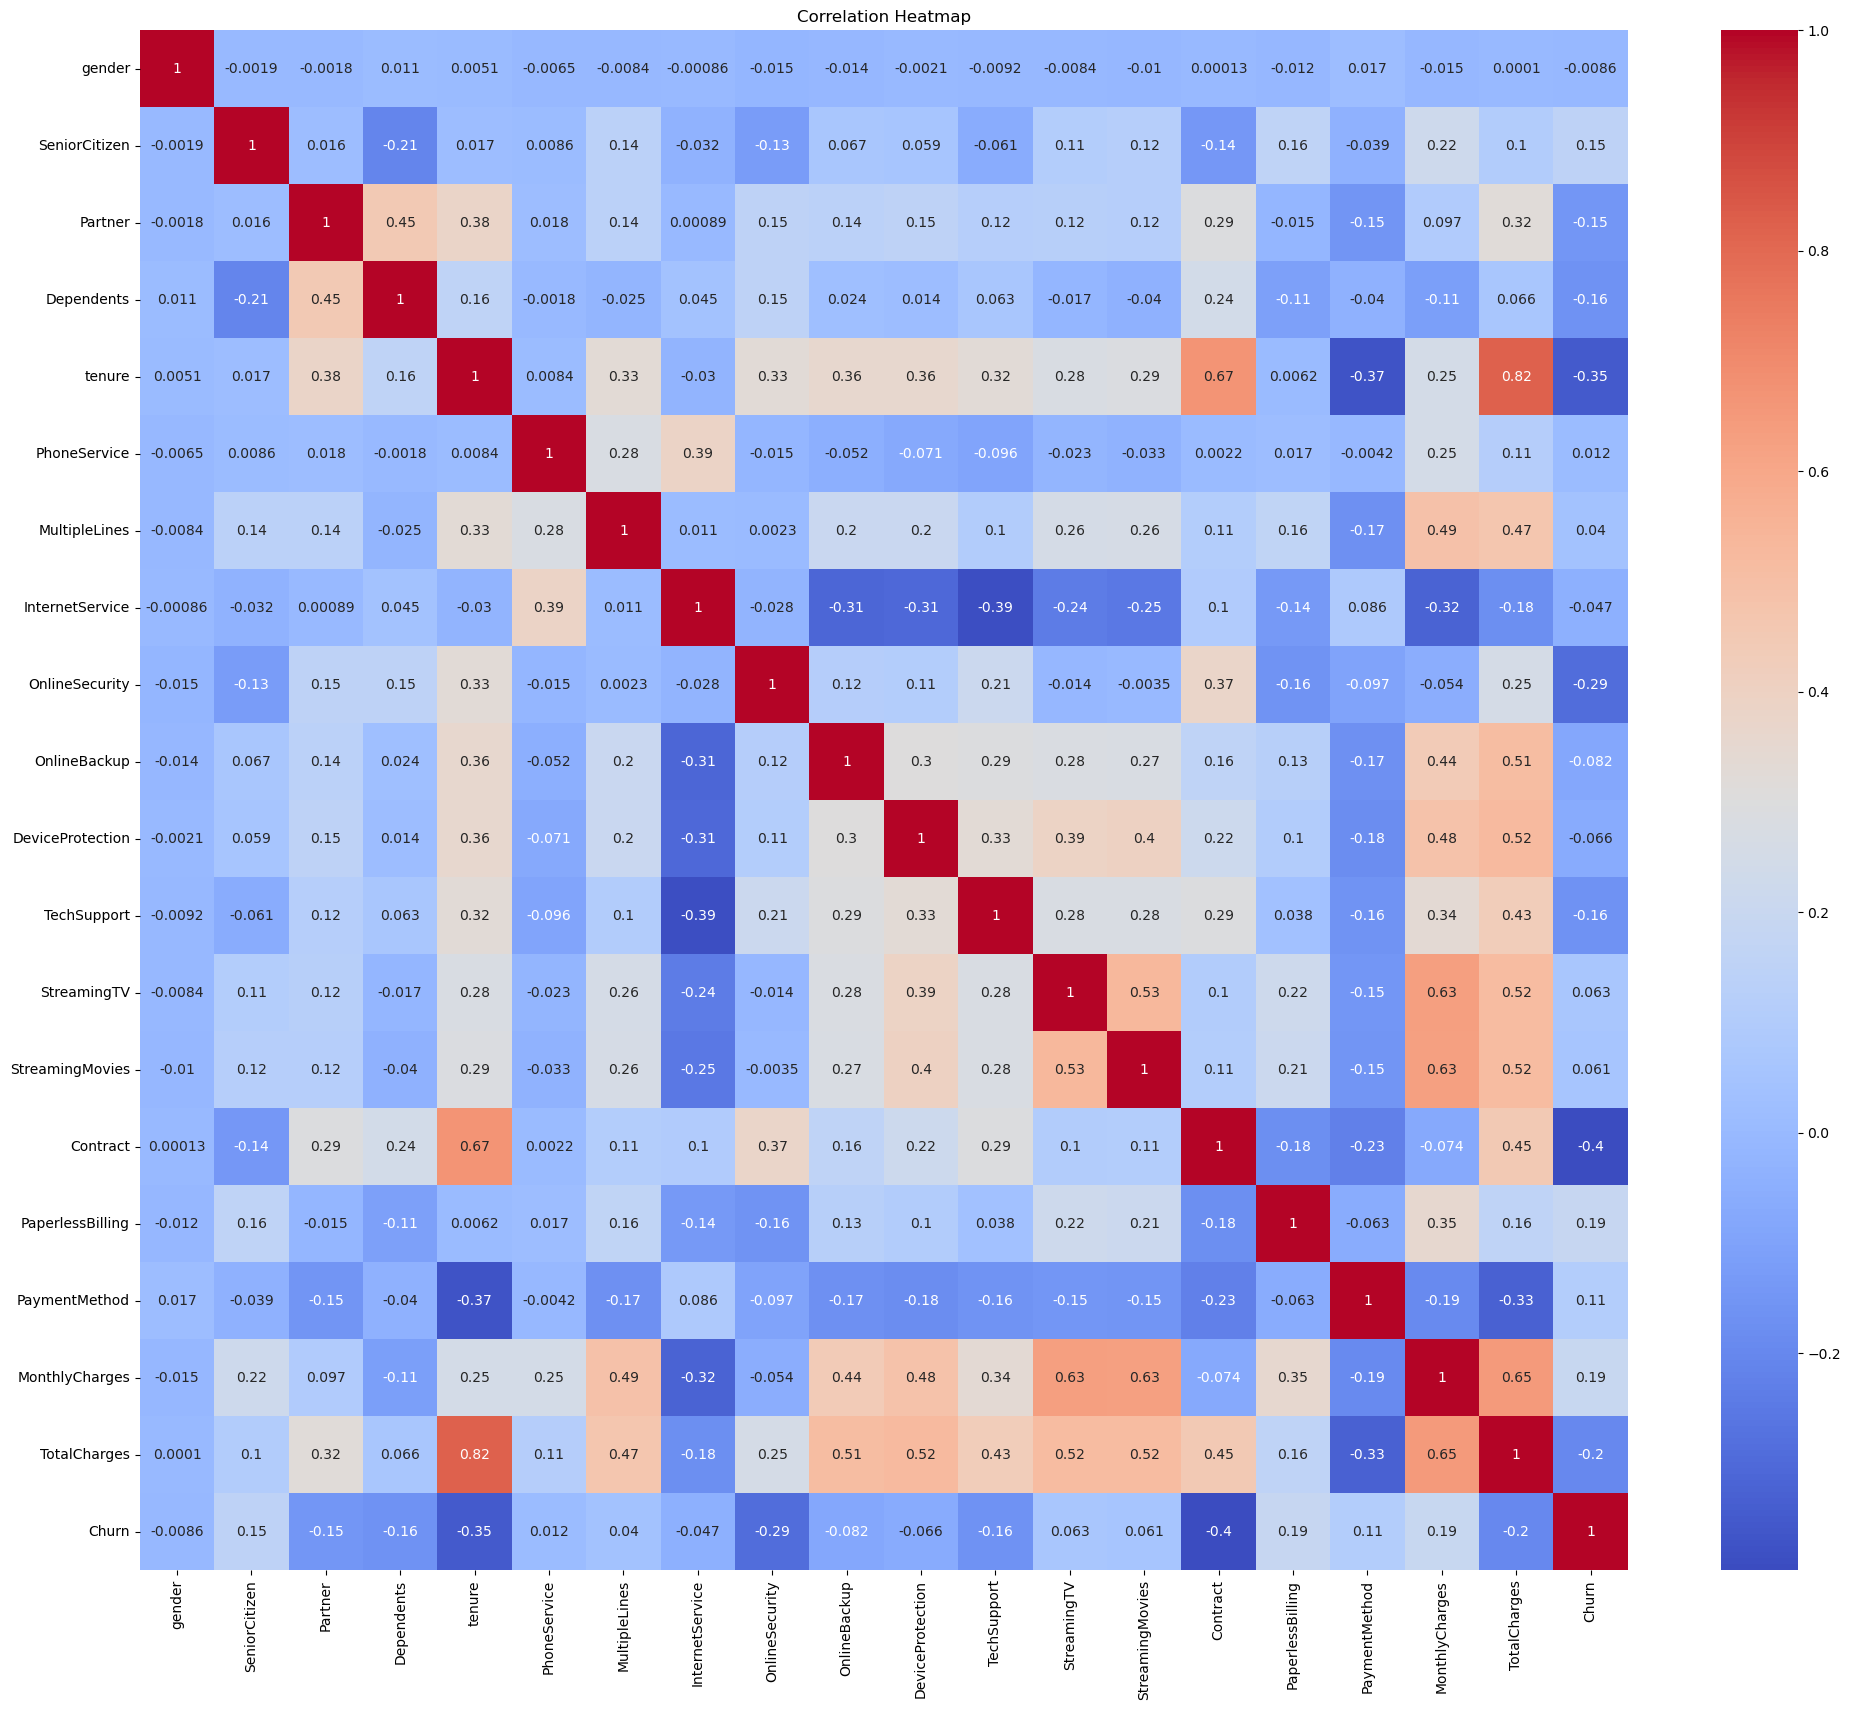

In [54]:
import seaborn as sns

# Assuming 'df' is your dataframe

# Create a correlation matrix from the dataframe
corr_matrix = df.corr()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(24, 20))

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=ax)

# Set the title of the heatmap
ax.set_title("Correlation Heatmap")

# Show the plot
plt.show()


# UNI variate data analysis

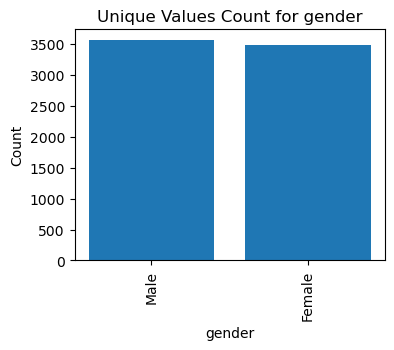

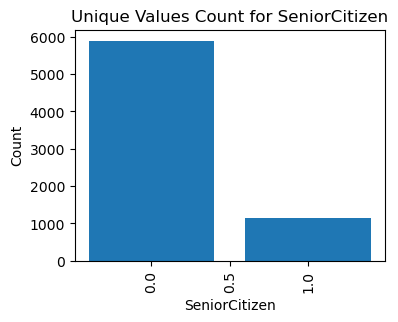

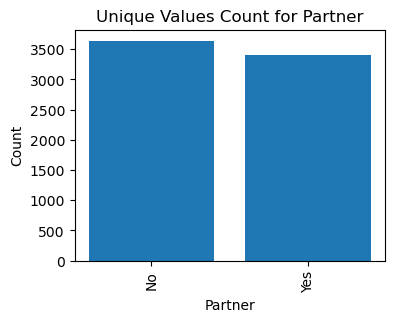

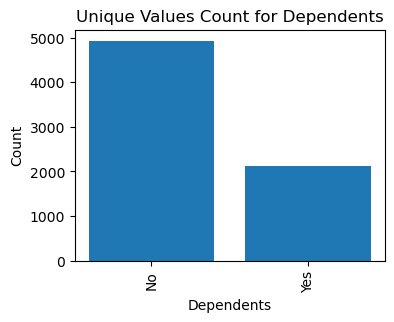

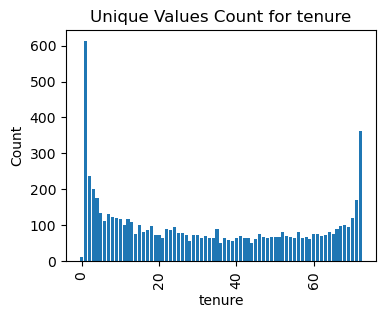

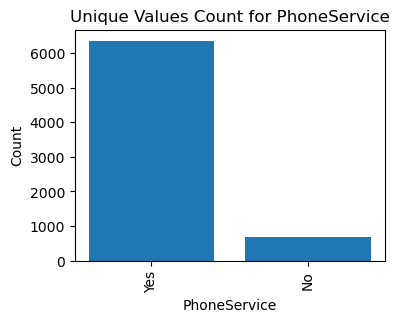

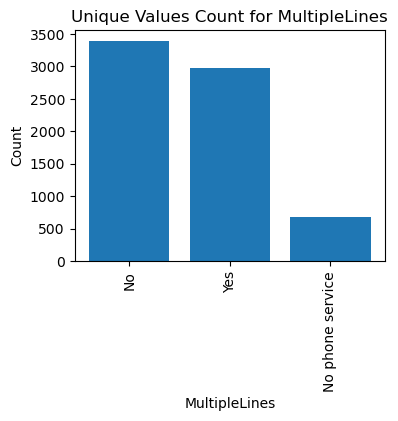

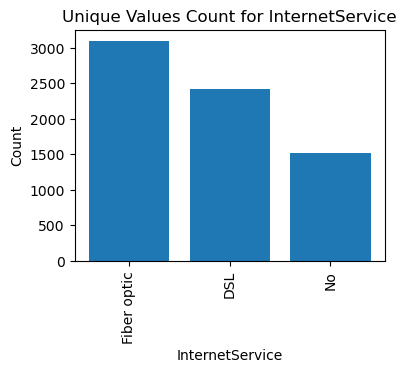

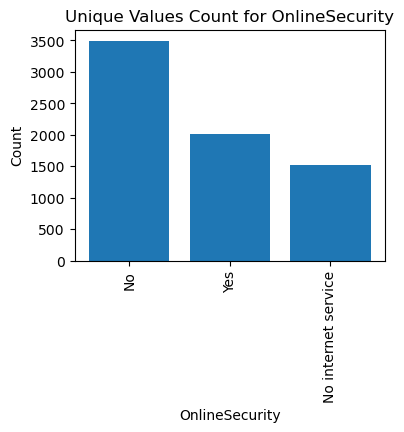

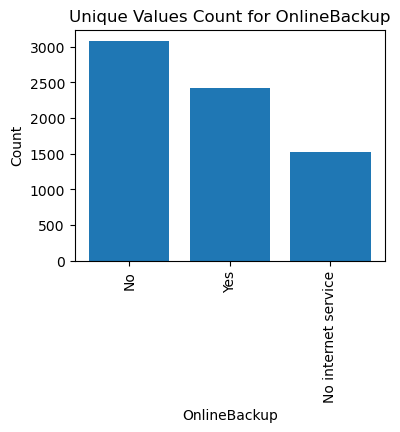

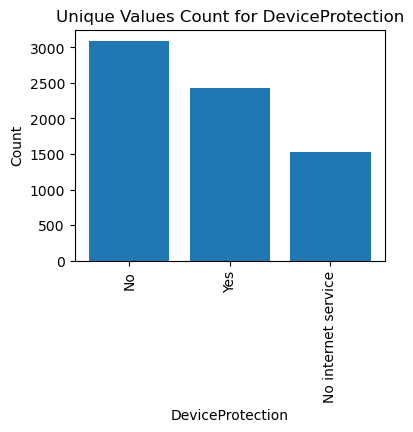

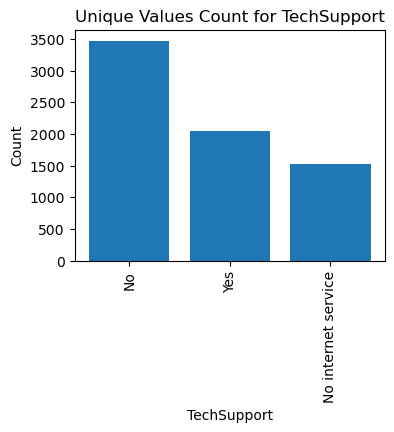

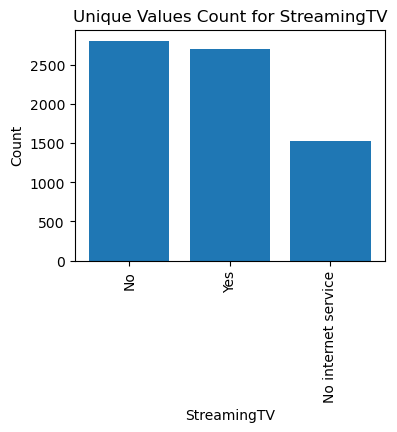

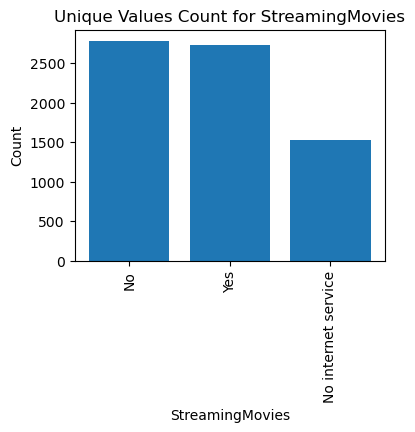

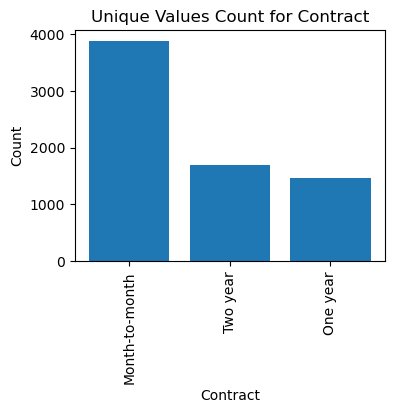

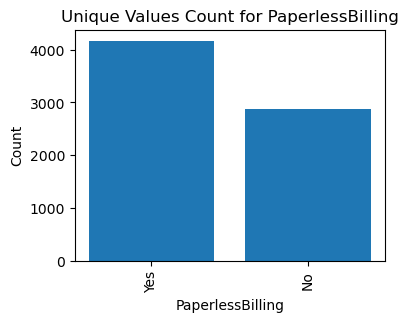

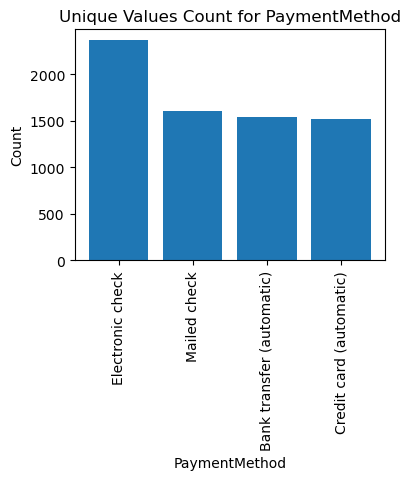

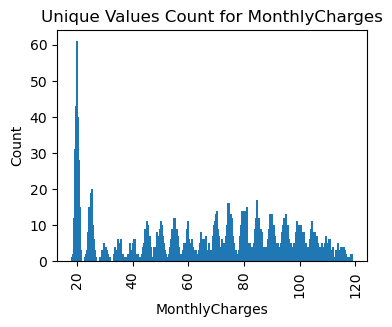

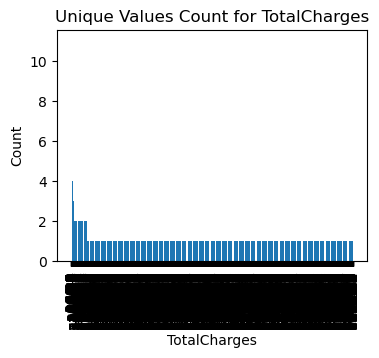

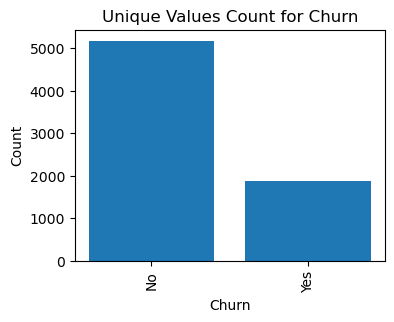

In [8]:

# Iterate over each column in the DataFrame
for column in df.columns:
    unique_values = df[column].unique()
    value_counts = df[column].value_counts()

    # Plot the count of unique values
    plt.figure(figsize=(4, 3))
    plt.bar(value_counts.index, value_counts.values)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Unique Values Count for {column}')
    plt.xticks(rotation=90)
    plt.show()


# OUTLIERS CHECK

In [17]:


# Calculate the Z-scores for each data point in the dataset
z_scores = np.abs((df - df.mean()) / df.std())

# Define a threshold (e.g., Z-score of 3)
threshold = 2.9

# Identify the outliers
outliers = np.where(z_scores > threshold)

C:\Users\muham\AppData\Local\Temp\ipykernel_696\1804650164.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((df - df.mean()) / df.std())
C:\Users\muham\AppData\Local\Temp\ipykernel_696\1804650164.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = np.abs((df - df.mean()) / df.std())


In [18]:
print(outliers)

(array([], dtype=int64), array([], dtype=int64))


# PCA Analysis

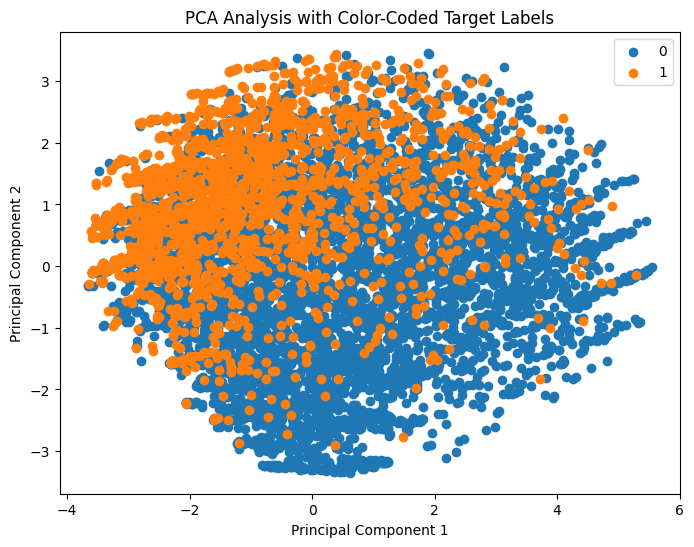

In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = df.drop('Churn', axis=1)
target = df['Churn']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a new DataFrame with the principal components and target variable
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Churn'] = target

# Plot the PCA results with color-coded target labels
plt.figure(figsize=(8, 6))
targets = df['Churn'].unique()
for target in targets:
    indices = pca_df['Churn'] == target
    plt.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], label=target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Analysis with Color-Coded Target Labels')
plt.legend()
plt.show()

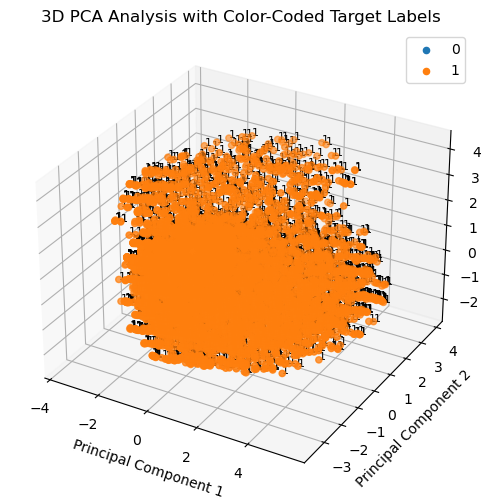

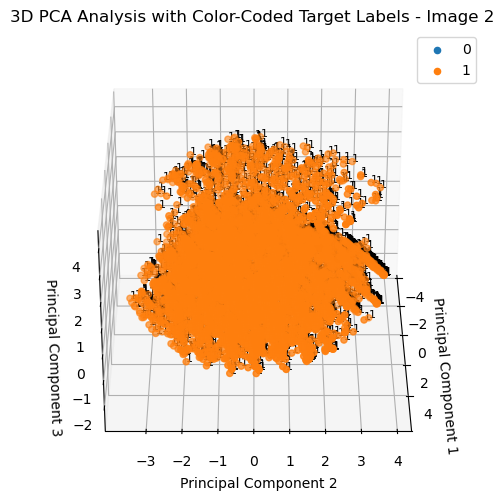

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler




# Perform PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_features)

# Create a new DataFrame with the principal components and target variable
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['Churn'] = target

# Plot the PCA results in a 3D scatter plot with labels
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
targets = df['Churn'].unique()
for target in targets:
    indices = pca_df['Churn'] == target
    ax.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], pca_df.loc[indices, 'PC3'], label=target)
    for x, y, z, label in zip(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], pca_df.loc[indices, 'PC3'],
                              pca_df.loc[indices, 'Churn']):
        ax.text(x, y, z, label, fontsize=8)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Analysis with Color-Coded Target Labels')
ax.legend()
plt.show()

# Plot the PCA results in a 3D scatter plot with labels - Image 2
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
targets = df['Churn'].unique()
for target in targets:
    indices = pca_df['Churn'] == target
    ax.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], pca_df.loc[indices, 'PC3'], label=target)
    for x, y, z, label in zip(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], pca_df.loc[indices, 'PC3'],
                              pca_df.loc[indices, 'Churn']):
        ax.text(x, y, z, label, fontsize=8)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Analysis with Color-Coded Target Labels - Image 2')
ax.view_init(azim=0, elev=30)  # Change azimuth and elevation angles
ax.legend()
plt.show()


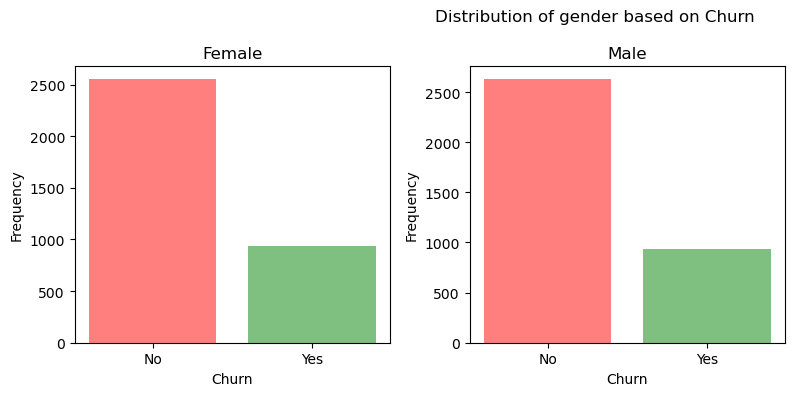

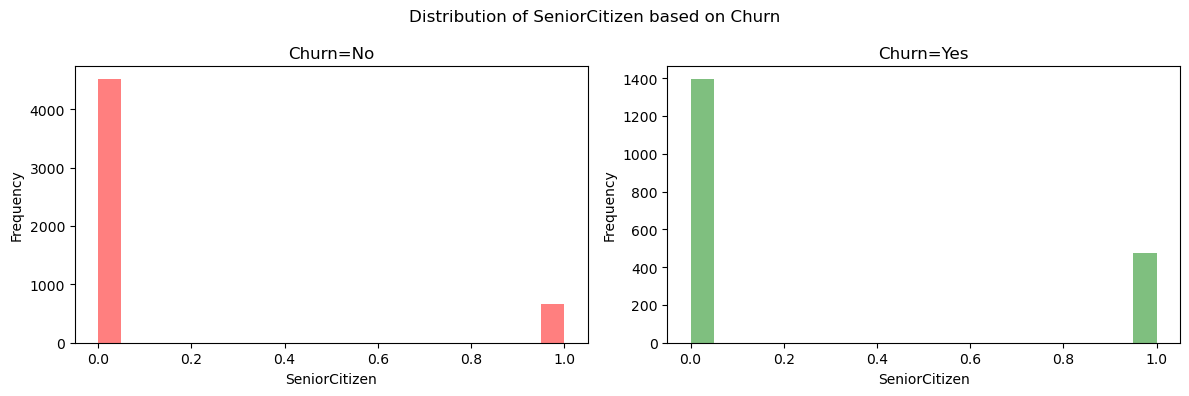

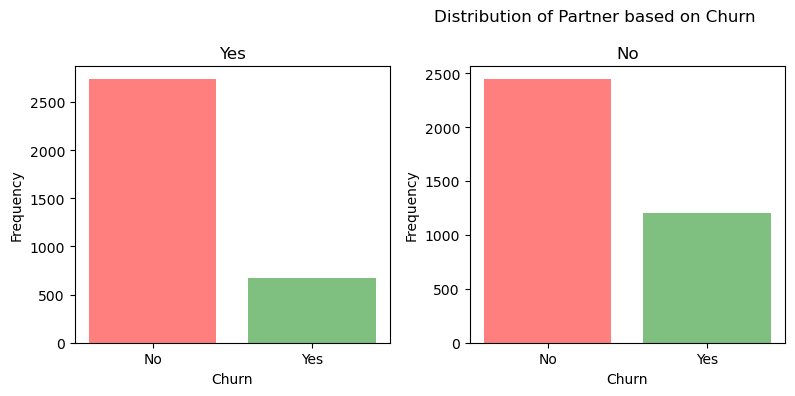

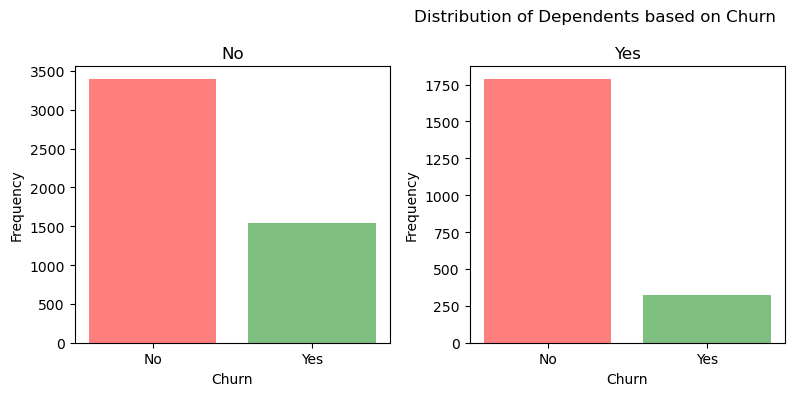

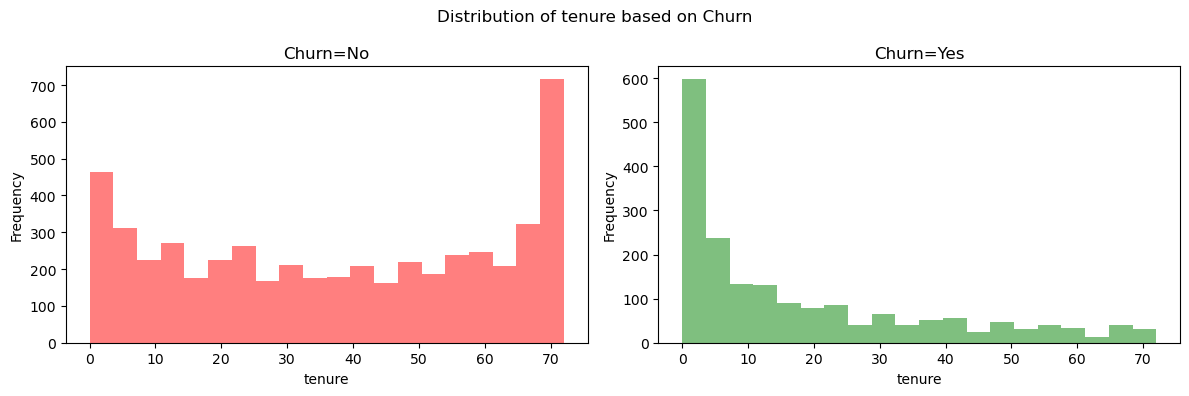

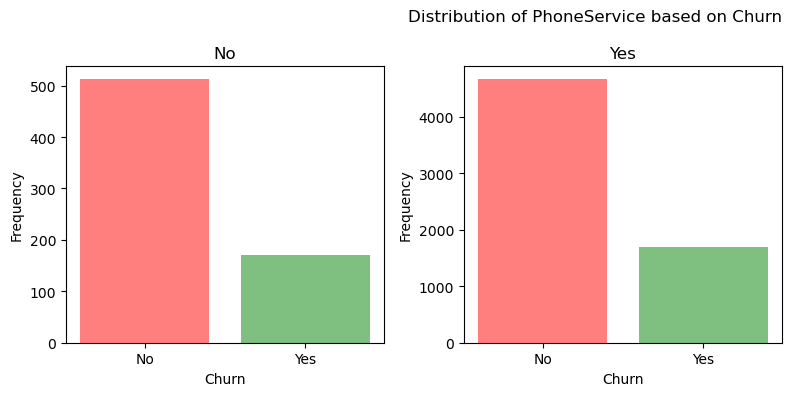

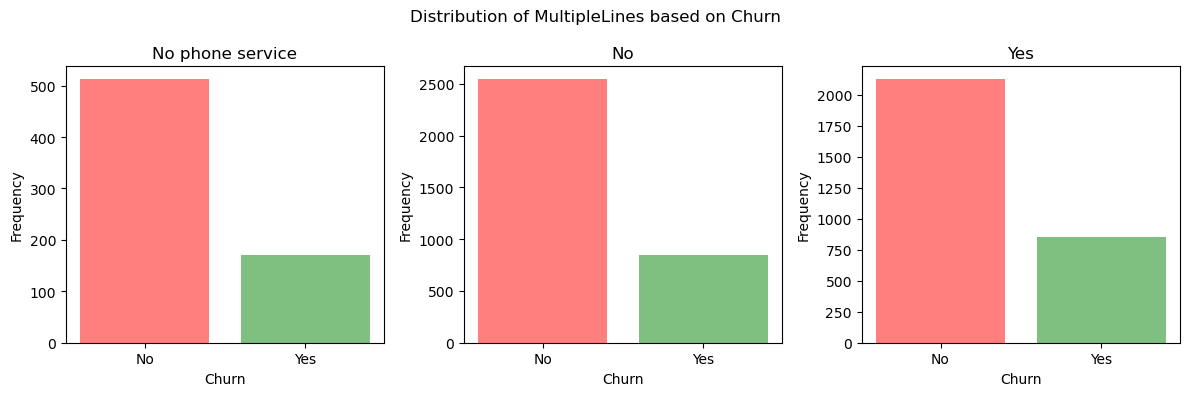

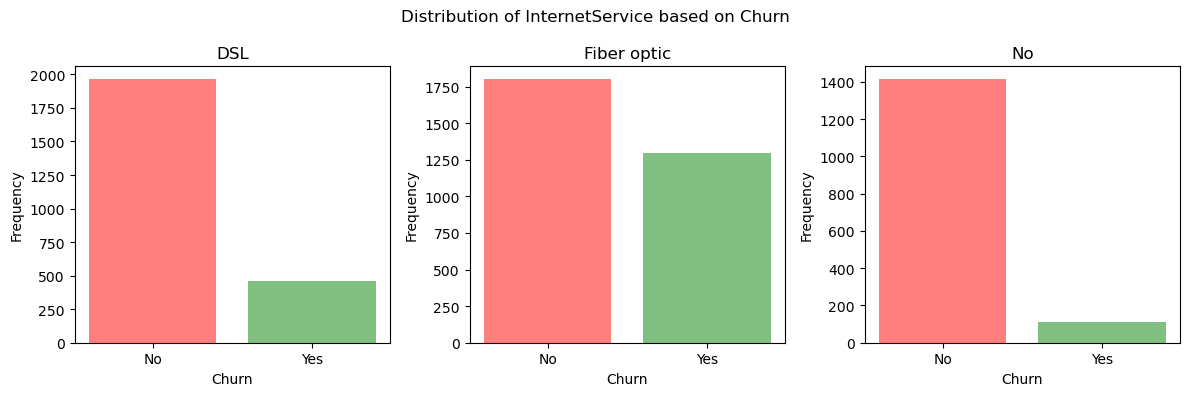

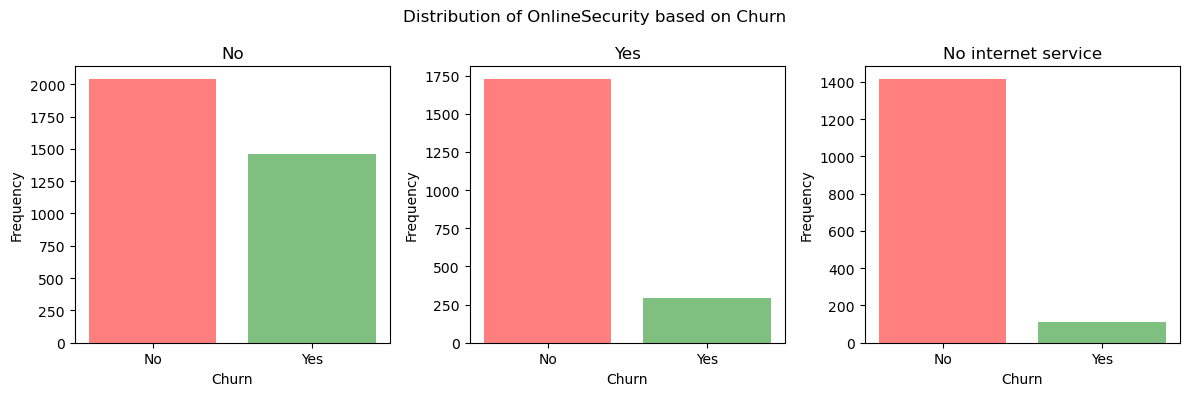

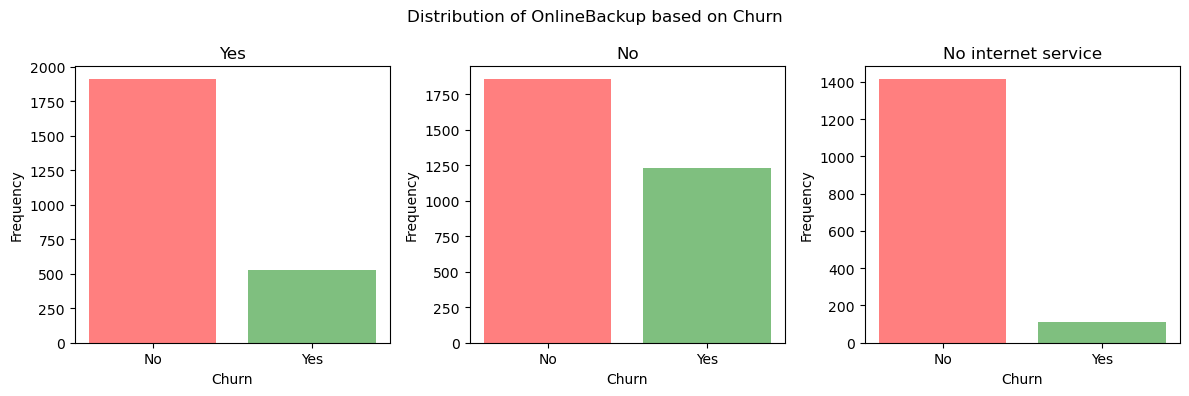

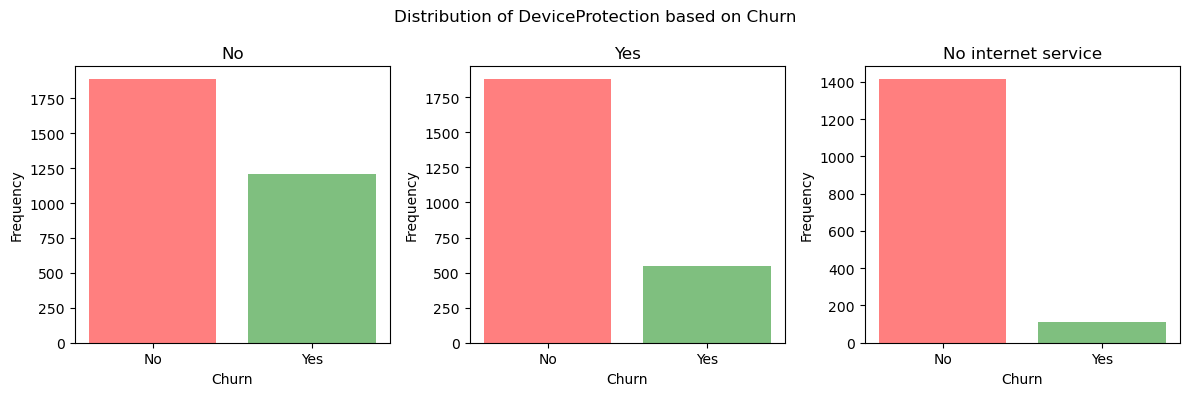

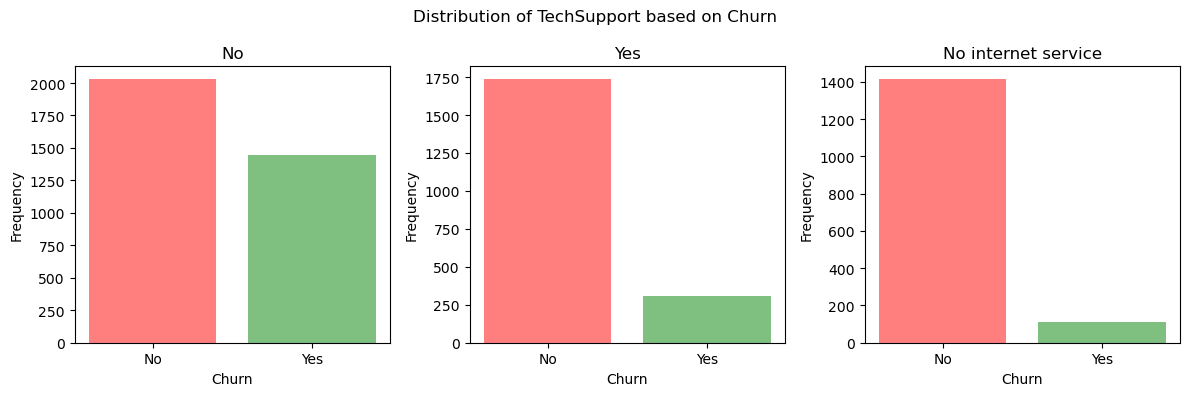

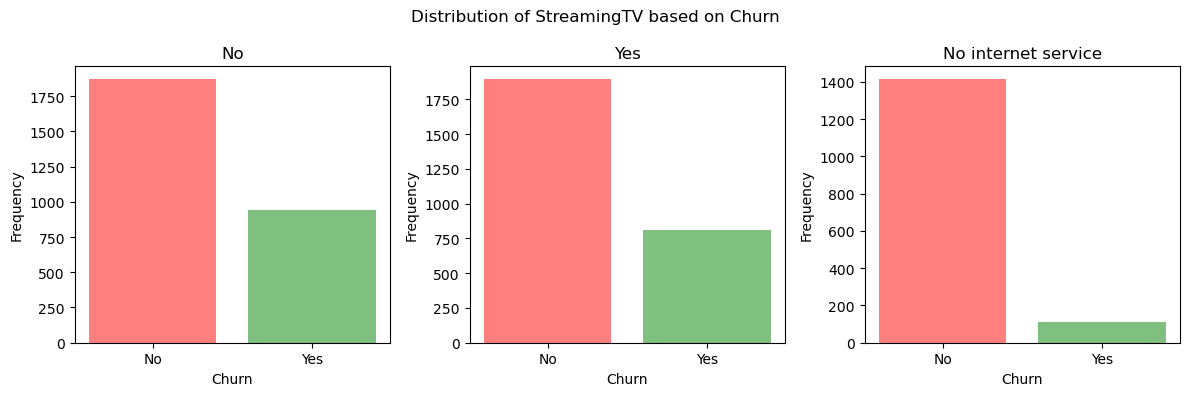

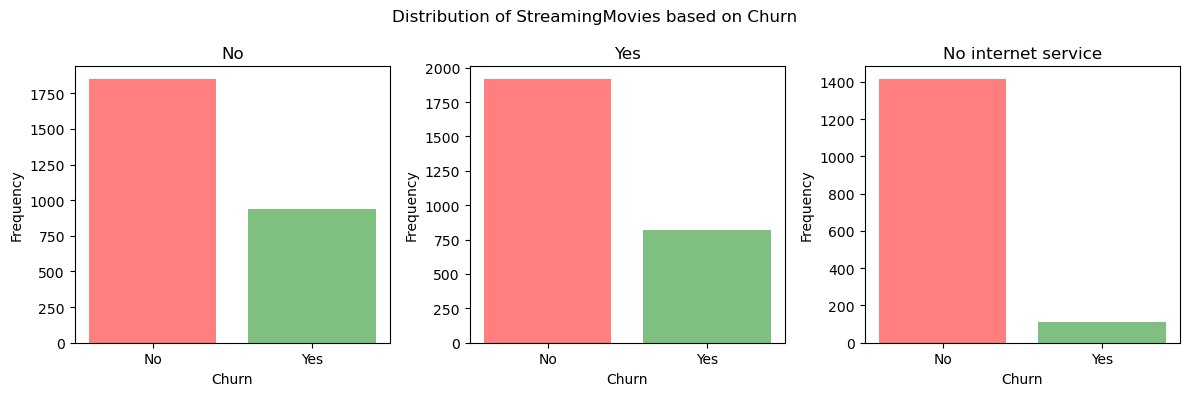

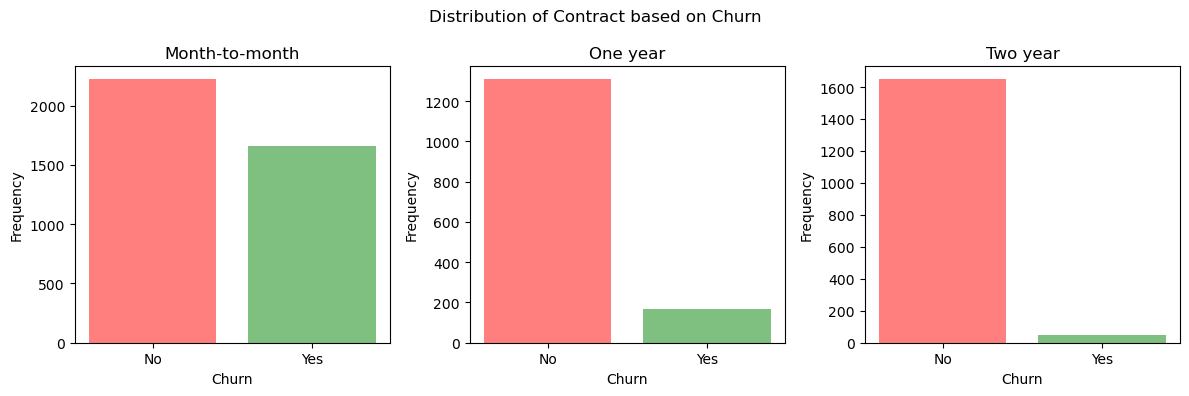

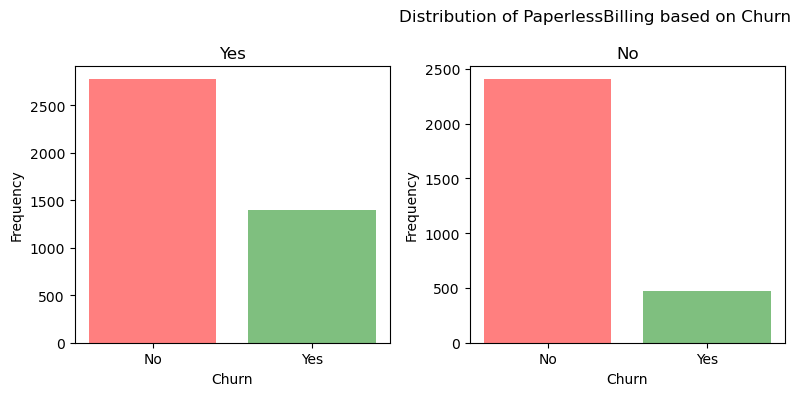

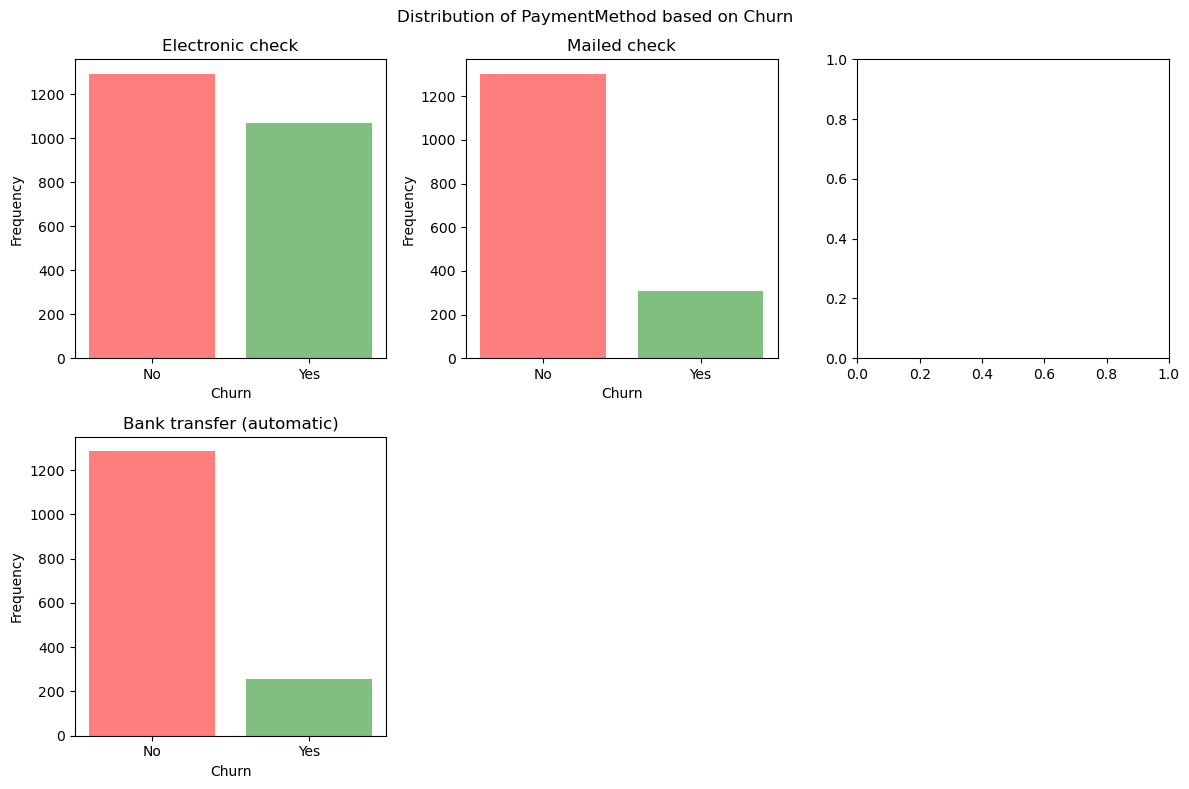

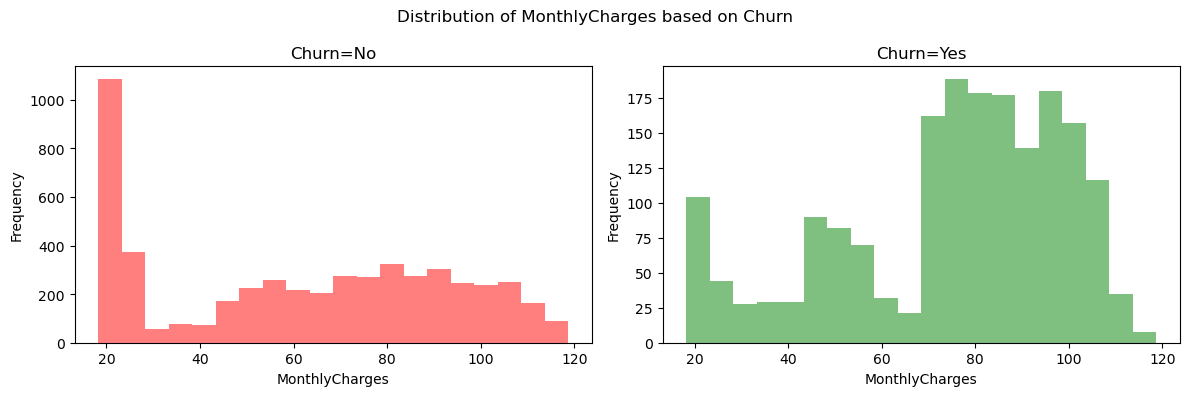

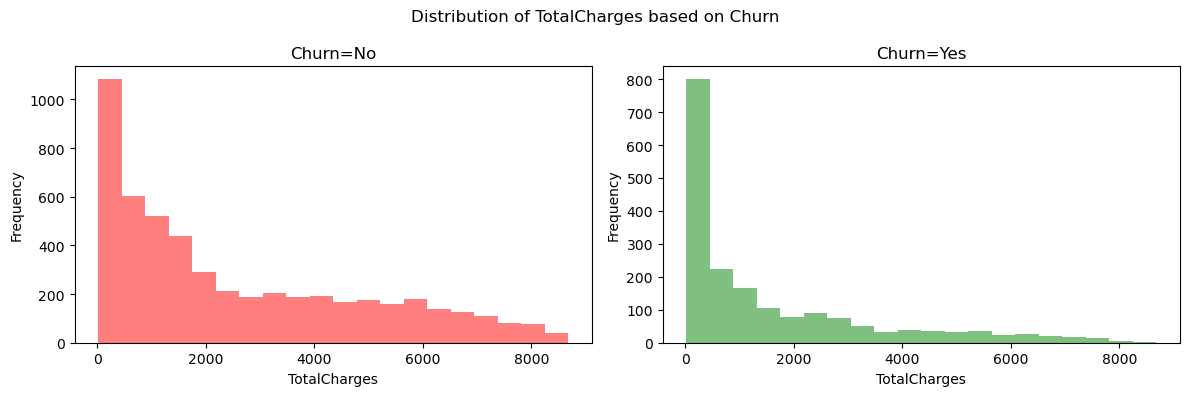

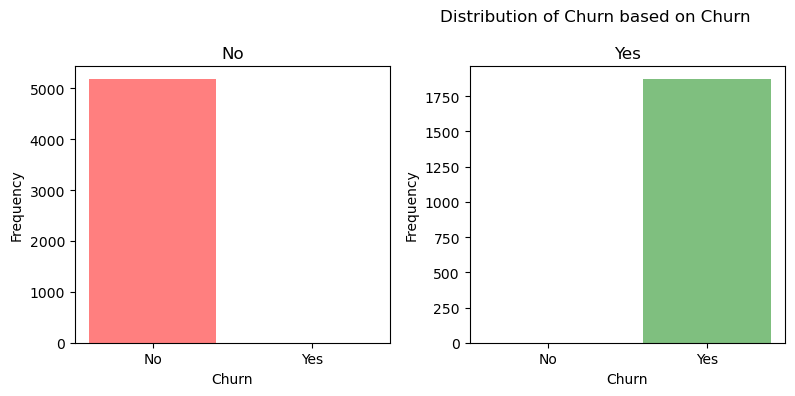

In [16]:
import numpy as np
import matplotlib.pyplot as plt


df_placeholder = df
cols = df_placeholder.columns

num_bins = 20  # Adjust the number of bins for the histogram
color = {'Yes': 'green', 'No': 'red'}

for i in cols:
    if df_placeholder[i].dtype != 'object':
        unique_labels = df_placeholder['Churn'].unique()
        num_labels = len(unique_labels)
        fig, axs = plt.subplots(1, num_labels, figsize=(12, 4))

        bins = np.linspace(df_placeholder[i].min(), df_placeholder[i].max(), num_bins + 1)

        for j, y_label in enumerate(unique_labels):
            axs[j].hist(df_placeholder[df_placeholder['Churn'] == y_label][i], bins=bins, alpha=0.5,
                        color=color[y_label])
            axs[j].set_xlabel(i)
            axs[j].set_ylabel('Frequency')
            axs[j].set_title(f'Churn={y_label}')

        fig.suptitle(f'Distribution of {i} based on Churn')
        plt.tight_layout()
        plt.show()
    else:
        unique_values = df_placeholder[i].unique()
        num_values = len(unique_values)
        num_rows = num_values // 3 + (num_values % 3 > 0)
        fig, axs = plt.subplots(num_rows, 3, figsize=(12, 4 * num_rows))

        for k, value in enumerate(unique_values):
            ax = axs[k // 2, k % 2] if num_rows > 1 else axs[k]
            for y_label, group_data in df_placeholder.groupby('Churn'):
                value_counts = group_data[group_data[i] == value].shape[0]
                ax.bar(y_label, value_counts, color=color[y_label], alpha=0.5)
            ax.set_xlabel('Churn')
            ax.set_ylabel('Frequency')
            ax.set_title(f'{value}')

        for ax in axs.flat[num_values:]:
            ax.set_visible(False)

        fig.suptitle(f'Distribution of {i} based on Churn')
        plt.tight_layout()
        plt.show()

# FEATURE IMPORTANCE

In [82]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Assuming 'churn' is the target label column in your dataframe 'df'
target_label = 'Churn'

# Select the relevant features from your dataframe
features = df.drop(target_label, axis=1)

# Calculate the information gain for each feature
info_gain = mutual_info_classif(features, df[target_label])

# Create a dataframe to store feature names and information gain values
info_gain_df = pd.DataFrame({'Feature': features.columns, 'Information Gain': info_gain})

# Sort the dataframe by information gain values in descending order
info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)

# Print the information gain for each feature
print(info_gain_df)


             Feature  Information Gain
14          Contract          0.096773
4             tenure          0.079709
8     OnlineSecurity          0.061256
7    InternetService          0.059102
11       TechSupport          0.055255
17    MonthlyCharges          0.051432
9       OnlineBackup          0.050953
16     PaymentMethod          0.046466
10  DeviceProtection          0.045485
18      TotalCharges          0.044680
13   StreamingMovies          0.037741
12       StreamingTV          0.035592
15  PaperlessBilling          0.023830
3         Dependents          0.012213
1      SeniorCitizen          0.006262
2            Partner          0.003780
6      MultipleLines          0.001017
0             gender          0.000231
5       PhoneService          0.000000


In [49]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load your data into a Pandas DataFrame called df
# ...

# Separate the target variable from the features
target = df['Churn']
features = df.drop('Churn',axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=10)

# Fit the classifier on the training set
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Create a dictionary of feature names and importances
feature_importances = dict(zip(features.columns, importances))

# Sort the dictionary by feature importance (descending order)
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the sorted list of feature names and importances
n = 0
for feature, importance in sorted_importances:
    
    print(f"{n} {feature}: {importance}")
    n+=1
# Use the trained model to predict on the test set
y_pred = rf.predict(X_test)


# Generate a confusion matrix and calculate the metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the confusion matrix and metrics
print("Confusion matrix:")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

0 TotalCharges: 0.17124579891809738
1 tenure: 0.143418564530078
2 MonthlyCharges: 0.14081433847638547
3 Contract: 0.07440036963466953
4 PaymentMethod_Electronic check: 0.042804223193160726
5 InternetService_Fiber optic: 0.03852609562475953
6 OnlineSecurity_No: 0.035923574660305484
7 SeniorCitizen: 0.021295393723572715
8 gender_Male: 0.0183532870619207
9 gender_Female: 0.018069435718858103
10 PaperlessBilling_Yes: 0.0165655194497306
11 Partner_Yes: 0.014626215197598689
12 TechSupport_Yes: 0.01394108782246078
13 Partner_No: 0.013741170798485764
14 OnlineBackup_Yes: 0.013507246123986415
15 StreamingTV_Yes: 0.013482140519888936
16 OnlineBackup_No: 0.013423681105935581
17 PaperlessBilling_No: 0.012991943025497579
18 TechSupport_No: 0.012430646137340054
19 Dependents_Yes: 0.011909124027908221
20 DeviceProtection_No: 0.011862079435503468
21 MultipleLines_Yes: 0.011527058876453201
22 Dependents_No: 0.011463279979077872
23 PaymentMethod_Mailed check: 0.011355939958415181
24 StreamingTV_No: 0.01

In [33]:
# Import necessary libraries
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
# Separate the target variable from the features
target = df['Churn']
features = df.drop('Churn',axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = clf.score(X_test, y_test)
# Generate a confusion matrix and calculate the metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the confusion matrix and metrics
print("Confusion matrix:")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
# Print the accuracy of the model
print("Accuracy: {:.2f}%".format(accuracy*100))

# def f_importances(coef, names, top=-1):
#     imp = coef
#     imp, names = zip(*sorted(list(zip(imp, names))))

#     # Show all features
#     if top == -1:
#         top = len(names)

#     plt.barh(range(top), imp[::-1][0:top], align='center')
#     plt.yticks(range(top), names[::-1][0:top])
#     plt.show()

# # Get feature importances and their names
# importances = clf.coef_[0]
# feature_names = df.columns

# # Create a dataframe with the feature importances
# importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# # Sort the dataframe by the absolute value of the feature importance
# importances_df['Importance_Abs'] = importances_df['Importance'].abs()
# importances_df_sorted = importances_df.sort_values('Importance_Abs', ascending=False).drop('Importance_Abs', axis=1)

# # Print the sorted feature importances
# for index, row in importances_df_sorted.iterrows():
#     print(row['Feature'], row['Importance'])
# # Specify your top n features you want to visualize.
# # You can also discard the abs() function 
# # if you are interested in negative contribution of features
# f_importances(abs(clf.coef_[0]), feature_names, top=25)


In [69]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

# Separate the target variable from the features
target = df['Churn']
features = df.drop('Churn',axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.5, random_state=42)
# Create a Gradient Boosting Classifier model
gbc = GradientBoostingClassifier()

# Fit the model to the data
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

# Get the feature importance
feature_importance = gbc.feature_importances_

# Rank the features from top to bottom
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)

# Print the feature importance rankings
print("Feature Importance:")
print(feature_importance_df)

# Generate a confusion matrix and calculate the metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the confusion matrix and metrics
print("Confusion matrix:")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Feature Importance:
             Feature  Importance
0           Contract    0.394111
1     MonthlyCharges    0.170273
2             tenure    0.151192
3     OnlineSecurity    0.091288
4       TotalCharges    0.089987
5   PaperlessBilling    0.016906
6      PaymentMethod    0.016786
7        TechSupport    0.014808
8       OnlineBackup    0.010375
9      SeniorCitizen    0.009290
10      PhoneService    0.007933
11   InternetService    0.007048
12   StreamingMovies    0.006583
13        Dependents    0.006337
14  DeviceProtection    0.002766
15            gender    0.002157
16     MultipleLines    0.001228
17           Partner    0.000636
18       StreamingTV    0.000295
Confusion matrix:
Predicted     0    1   All
True                      
0          2331  245  2576
1           455  491   946
All        2786  736  3522
Accuracy: 0.8012492901760363
Precision: 0.7911390094002592
Recall: 0.8012492901760363
F1 Score: 0.7927341264067741


In [83]:
# Defining a parameter grid for hyperparameter tuning with different values to be tested for 'n_estimators', 'max_depth', and 'max_features' hyperparameters
param_grid = [{'n_estimators': [100, 200, 300], 'max_depth': [None,2,3,10,20], 'max_features': ['sqrt',2,4,8,16,'log2', None]}]

In [84]:
# Creating a random forest classifier object 'temp_rf' with a random state of 0 and parallel processing enabled
temp_rf=RandomForestClassifier(random_state=0,n_jobs=-1)
# Creating a grid search object 'grid_search' using the 'GridSearchCV' function, with a random forest classifier as the estimator, a parameter grid, 'roc_auc' as the scoring metric, and 5-fold cross-validation with parallel processing
grid_search=GridSearchCV(estimator=temp_rf, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

In [85]:
# Performing grid search on the training data to find the best hyperparameters for the model
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid=[{'max_depth': [None, 2, 3, 10, 20],
                          'max_features': ['sqrt', 2, 4, 8, 16, 'log2', None],
                          'n_estimators': [100, 200, 300]}],
             scoring='roc_auc')

In [87]:
# Calculating the best RMSE score found by Grid Search 
grid_search.best_score_

0.8312028892982337

In [74]:
# Retrieving the best parameter values found by the grid search
grid_search.best_params_


{'max_depth': 3, 'max_features': 2, 'n_estimators': 300}

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Create a Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2576
           1       0.72      0.41      0.53       946

    accuracy                           0.80      3522
   macro avg       0.77      0.68      0.70      3522
weighted avg       0.79      0.80      0.78      3522



In [56]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}


OHE + simplfied NO 
rbf = {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 200}
gbc = Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}
label + simplified
rbf = {'max_depth': 3, 'max_features': 2, 'n_estimators': 300} 83
gbc = Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300} 80
label + NOT simplified
 
